# ML Tutorial Day 8

We saw that linear regression was used to predict values for `Home Prices`, `Weather`, `Stock Prices`, etc., where the predicted value belongs to a continuous domain. If we want to make predictions in the following scenarios, linear regression will not be useful:
1. if an email is spam or not
2. will a customer buy life insurance
3. which party will a person vote for during elections

Linear regression fails in these cases because the predicted value is categorical, with defined values as it doesn't belong to a continuous domain.

The problems with categorical values are called `Classification` problems and logistic regression is the technique used for classification.

Classification can be further divided into to types:
1. Binary: When only two options are available, like, in a yes/no type scenario.
2. Multiclass: When more than two options are available

In [40]:
import pandas as pd
from sklearn import linear_model as linMod
from matplotlib import pyplot as plt
import numpy as np

# importing data
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


Off the bat, we can see that younger people tend to not buy insurance, while older people usually have it. First, we'll plot and visualize the data.

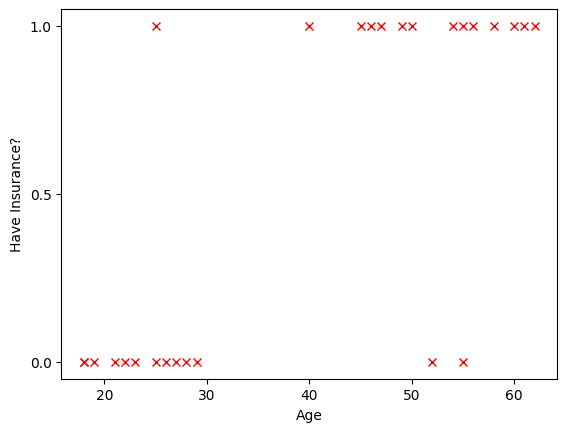

In [41]:
plt.xlabel('Age')
plt.ylabel('Have Insurance?')
plt.yticks([0, 0.5, 1])
plt.plot(df['age'], df['bought_insurance'], 'rx')
plt.show()

# Logistic Regression
The sigmoid function used for logistic regression is given as follows:

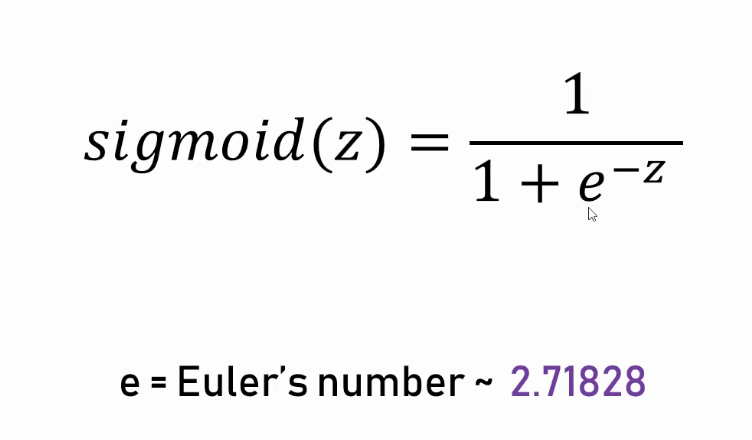

This functions maps any input from $\mathbb{R}$ to $[0,1]$


This article explains in depth [why sigmoid](https://www.dailydoseofds.com/why-do-we-use-sigmoid-in-logistic-regression/) function is the preferred choice. We will see how does the sigmoid function looks like:

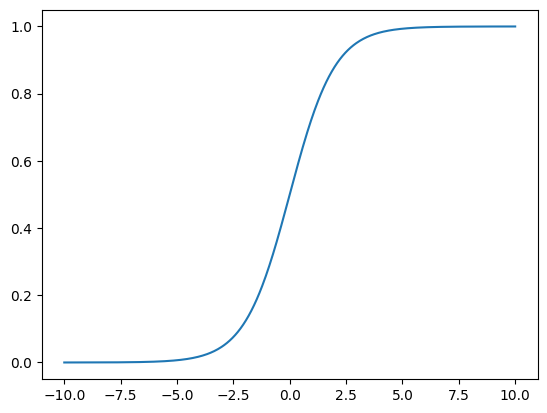

In [42]:
x = np.linspace(-10, 10, num = 500)
y = [1/(1+(np.exp(-i))) for i in x]
plt.plot(x, y)

Now we will train a model on our data to make predictions. The logistic regression gives us a probability of the given belonging to a particular class.

In [49]:
# dividing the data into training and testing sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df[['age']], df['bought_insurance'], test_size = 0.1)

# training the model
logreg = linMod.LogisticRegression()
logreg.fit(X_train.values, y_train.values)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
# testing the model
logreg.predict(X_test.values)

array([0, 0, 1])

In [53]:
# testing the model
logreg.score(X_test.values, y_test.values)

1.0

In [58]:
# showing the probability of a datapoint being in a class
logreg.predict_proba([[73]])

array([[0.01318192, 0.98681808]])